# Exploratory Data Analysis 
## Purpose of this project
Project 6 is an opportunity to create my own custom exploratory data analysis (EDA) project using GitHub, Git, Jupyter, pandas, Seaborn and other popular data analytics tools.

Author: Adrianna Webb

Date: 10/06/2024

## Import Libraries 

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa 

## Load the Dataset 'healthexp' into the DataFrame
The healthexp dataset is commonly used in economic and health data analysis, representing healthcare expenditure data across different countries.

In [3]:
# Load the dataset into a pandas DataFrame 
df = sns.load_dataset('healthexp')

# Inspect first rows of the DataFrame
print(df.head())

   Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9


## Inital Data Inspection 
The inital data inspection give us an idea of what the data looks like including some of the contents of it's columns and rows.

In [4]:
# Inital Data Inspection
print(df.head(10))
print(df.shape)
print(df.dtypes)

   Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9
5  1971         Canada       313.391             72.8
6  1971        Germany       298.251             70.8
7  1971  Great Britain       134.172             71.9
8  1971          Japan       163.854             72.9
9  1971            USA       357.988             71.2
(274, 4)
Year                 int64
Country             object
Spending_USD       float64
Life_Expectancy    float64
dtype: object


### Data Inspection Results
- Year: The year of the data observation. 
    - data type: int64
- Country: The country for which the data is recorded.
    - data type: object (string)
- Spending_USD: The healthcare spending per capita in US dollars for each country.
    - data type: float64
- Life_Expectancy: The average life expectancy in years for that country in the given year.
    - data type: float64

## Inital Descriptive Statistics

In [5]:
print(df.describe())

              Year  Spending_USD  Life_Expectancy
count   274.000000    274.000000       274.000000
mean   1996.992701   2789.338905        77.909489
std      14.180933   2194.939785         3.276263
min    1970.000000    123.993000        70.600000
25%    1985.250000   1038.357000        75.525000
50%    1998.000000   2295.578000        78.100000
75%    2009.000000   4055.610000        80.575000
max    2020.000000  11859.179000        84.700000


### Descriptive Statistics Results 
- **Sample Size:**  274
- **Year Range:** 1970 - 2020
- **Mean Spend:** $2,789 
- **Mean Life Expectancy:** 77 years

## Initial Data Distribution for Numerical Columns

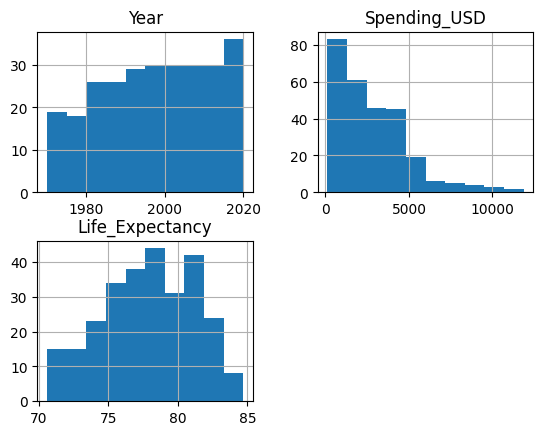

In [6]:
# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

### Data Distribution Results
-**Year:**
   
    -Data evenly spread from 1970 to 2020, with concentration towards 2020, indicating more recent data collection than in past years

-**Spending:**
    
    -Right-skewed distribution; most countries have low healthcare expenditures (below $5,000), with few outliers exceeding $10,000.
    
-**Life Expectancy:**
   
    -Normal distribution; most countries between 75-80 years, fewer below 75 or above 80, suggesting stable life expectancy with moderate variability.

## Initial Data Distribution for Categorical Columns

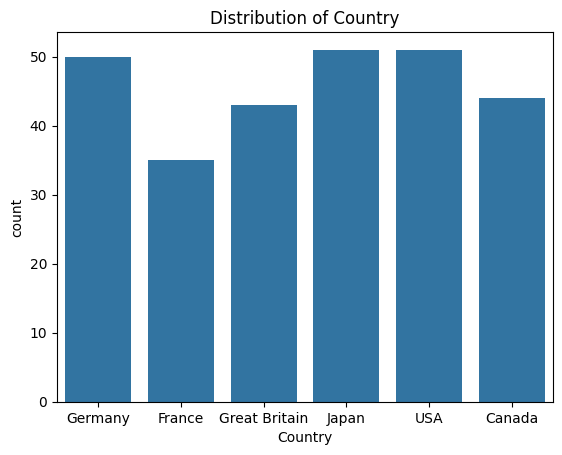

In [8]:
# Inspect value counts by categorical column
df['Country'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

### Data Distribution for Categorical Columns Results
While the USA, Japan, and Germany were included in the data for all 50 years that have been measured, countires like France, Great Britain, and Canada weren't included in the data until later years

## Inital Data Transformation and Feautre Engineering 
I will change the name of the 'Life_Expectancy' and 'Spending_USD' columns to be 'Life Expectancy' and 'Spending in USD'.

In [9]:
# Renaming a column
df.rename(columns={'Life_Expectancy': 'Life Expectancy'}, inplace=True)
df.rename(columns={'Spending_USD': 'Spending in USD'}, inplace=True)


# Adding a new column
df['Spending per Life Year'] = df['Spending in USD'] / df['Life Expectancy']

## Visualizations

### Visualization 1
**Goal:** Look at the relationship between healthcare spending and life expectancy.

**Chart Type**: A scatter plot because its capable of plotting healthcare spending on one axis and life expectancy on the other, making it easy to visualize any correlation between the two.

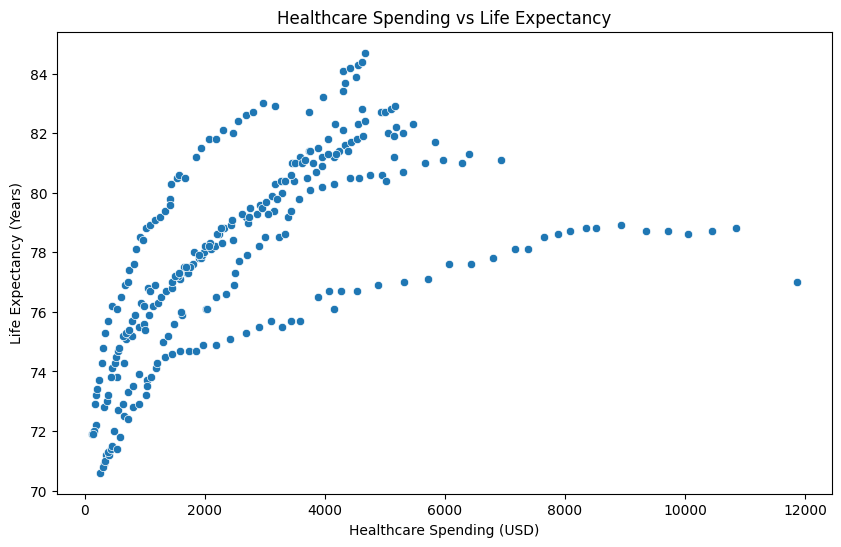

In [11]:
# Create a scatter plot of Spending vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spending in USD', y='Life Expectancy', data=df)

# Add titles and labels
plt.title('Healthcare Spending vs Life Expectancy')
plt.xlabel('Healthcare Spending (USD)')
plt.ylabel('Life Expectancy (Years)')
plt.show()

### Visualization 1 Results
The scatter plot reveals a general trend of higher healthcare spending correlating with increased life expectancy, but the relationship isn't strictly linear. Some countries achieve high life expectancy with moderate spending, while others show diminishing returns on high expenditures. This suggests other factors, like healthcare efficiency or social determinants, also influence life expectancy.

### Visualization 2
- **Goal**: Analyze healthcare spending trends over time across countries to identify consistent increases or rapid changes.
- **Chart Type**: Line plot to visualize spending trends by year using seaborn.

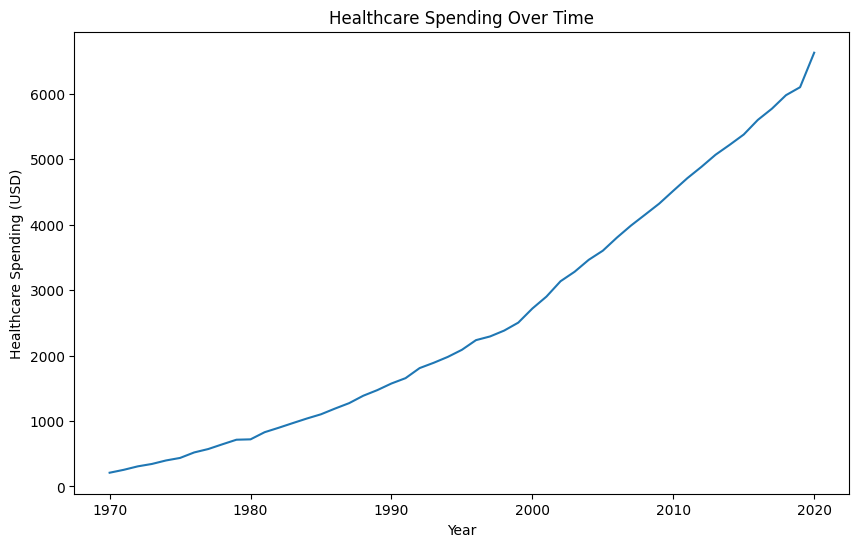

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Spending in USD', data=df, errorbar=None)

# Add titles and labels
plt.title('Healthcare Spending Over Time')
plt.xlabel('Year')
plt.ylabel('Healthcare Spending (USD)')
plt.show()

### Visualization 2 Results
The line plot shows a clear increase in healthcare spending over time. Recent decades exhibit a sharp rise, indicating countries are investing more in healthcare. Despite some early fluctuations, the overall trend demonstrates steady growth in global healthcare investments.

### Visualization 3
- **Goal**: Compare life expectancy across countries to identify health outcome disparities.
- **Chart Type**: Bar plot for easy comparison of average life expectancies.

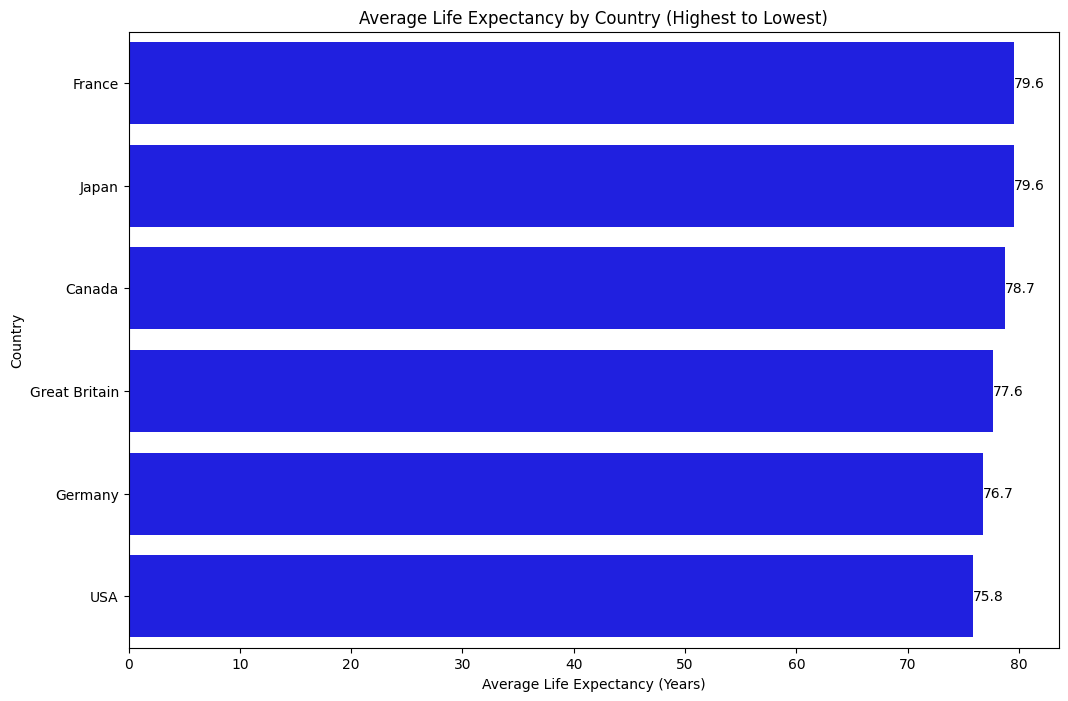

In [17]:
# Calculate average life expectancy by country
avg_life_exp_by_country = df.groupby('Country')['Life Expectancy'].mean().reset_index()

# Sort the data by Life Expectancy in descending order
avg_life_exp_by_country = avg_life_exp_by_country.sort_values(by='Life Expectancy', ascending=False)

# Create the bar plot 
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Life Expectancy', y='Country', data=avg_life_exp_by_country, color='blue')  

# Add titles and labels
plt.title('Average Life Expectancy by Country (Highest to Lowest)')
plt.xlabel('Average Life Expectancy (Years)')
plt.ylabel('Country')

# Annotate each bar with the exact value
for index, value in enumerate(avg_life_exp_by_country['Life Expectancy']):
    plt.text(value, index, f'{value:.1f}', va='center')  

plt.show()


### Visualization 3 Results
The bar plot shows slight differences in average life expectancy across countries. Japan and France lead with averages of 79.6 years. Other nations, including some developed ones, fall below. This shows how health outcomes can vary greatly even with comparable healthcare spending.